### ✔ Data Processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

data = pd.read_csv('./music.csv')

data = data.dropna()
data = data.drop(columns = ['Timestamp', 'Permissions'])
data.drop(data[data['Age'] >= 70].index, inplace = True)
data.drop(data[(data['BPM'] > 300) | (data['BPM'] == 170)].index, inplace = True)
data.drop(data[data['Primary streaming service'] == 'Pandora'].index, inplace = True)
data.drop(data[data['Anxiety'] == 7.5].index, inplace = True)
data.drop(data[data['Depression'] == 3.5].index, inplace = True)
conditions = [9, 0, 24, 15, 0.25, 2.5, 16, 18, 0.7, 11, 14]
data = data[~data['Hours per day'].isin(conditions)]
data = data[~data['Fav genre'].isin(['Gospel', 'Latin'])]
bpm_counts = data['BPM'].value_counts()
bpm_to_drop = bpm_counts[bpm_counts <= 4].index
data = data[~data['BPM'].isin(bpm_to_drop)]
data = data.sort_values('Age')

data.index = [i+1 for i in range(len(data))]
for column1 in ['While working', 'Instrumentalist','Composer', 'Exploratory', 'Foreign languages']:
    data[column1] = data[column1].apply(lambda x: 1 if x == 'Yes' else 0)

old_column_names = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
new_column_names = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music']
for old_col, new_col in zip(old_column_names, new_column_names):
    data.rename(columns = {old_col: new_col}, inplace=True)

def map_values1(x):
    if x == 'Never':
        return 0
    elif x == 'Rarely':
        return 1
    elif x== 'Sometimes':
        return 2
    elif x == 'Very frequently':
        return 3
for column2 in new_column_names:
    data[column2] = data[column2].apply(map_values1)

for column in new_column_names:
    data[column +'copy'] = data[column].copy()
    data.rename(columns={column + 'copy': column +'1'}, inplace=True)

data.rename(columns={'Classical1': 'classical', 'Country1': 'country', 'EDM1': 'edm', 'Folk1': 'folk', 'Gospel1': 'gospel', 'Hip hop1': 'hip hop', 'Jazz1': 'jazz',
                     'K pop1': 'k pop', 'Latin1': 'latin', 'Lofi1': 'lofi', 'Metal1': 'metal', 'Pop1': 'pop',
                     'R&B1': 'r&b', 'Rap1': 'rap', 'Rock1': 'rock', 'Video game music1': 'video game music'}, inplace=True)
copy_column_names = ['classical', 'country', 'edm', 'folk', 'gospel', 'hip hop', 'jazz',
                     'k pop', 'latin', 'lofi', 'metal', 'pop', 'r&b', 'rap', 'rock', 'video game music']

for column3 in copy_column_names:
    data[column3] = data[column3].apply(lambda x: 1 if x > 0 else 0)
data['Frequency count'] = data[copy_column_names].sum(axis = 1)
data['Average frequency'] = data[new_column_names].sum(axis = 1)/data['Frequency count']
data['Average frequency'] = data['Average frequency'].round(1)
data = data[~data['Frequency count'].isin([1, 2, 3])]

def map_values2(x):
    if x == 'Worsen':
        return 0
    elif x == 'No effect':
        return 1
    elif x == 'Improve':
        return 2
data['Music effects'] = data['Music effects'].apply(map_values2)

Exp = data.pop('Exploratory')
data.insert(data.columns.get_loc('Average frequency') + 1, 'Exploratory', Exp)

### 🔹 Ranking of people's favorite streaming services
#### The most widely used streaming service is Spotify, surpassing other platforms in terms of popularity.

In [ ]:
streaming_counts = data['Primary streaming service'].value_counts().sort_values(ascending = False)
fig = px.bar(data_frame = streaming_counts, y = streaming_counts, template = 'plotly_dark', color_discrete_sequence = px.colors.qualitative.Set3)
fig.update_layout(title = 'Ranking of Primary streaming services', margin = dict(t = 100), title_x = 0.5, title_xanchor = 'center',
                  xaxis = dict(title_standoff = 20), yaxis = dict(title = 'Counts', title_standoff = 20), bargap = 0.5,
                  hoverlabel_bgcolor = 'white', height = 400, width = 600)
fig.update_traces(hovertemplate = '<b>Primary streaming service:</b> %{x}<br><b>Counts:</b> %{y}')
fig.update_xaxes(showline=True, linewidth=3, linecolor='red')
fig.update_yaxes(showline=True, linewidth=3, linecolor='red')
fig.show()

### 🔹 BPM according to people's preferred music genre
#### When looking at the top 5 criteria, the BPM (heart rate) of people whose favorite genres are EDM, Metal, Jazz, Rap, and Video game music is high.

In [ ]:
df2 = data.groupby('Fav genre')['BPM'].mean().astype(int).reset_index().sort_values('BPM', ascending = False)
fig = px.bar(data_frame = df2, x = 'Fav genre', y = 'BPM', template = 'plotly_dark', color_discrete_sequence = px.colors.qualitative.Set3)
fig.update_layout(title = 'BPM ranking according to Favorite genres', margin = dict(t = 100), title_x = 0.5, title_xanchor = 'center',
                  xaxis = dict(title = 'Favorite genre', title_standoff = 20), yaxis = dict(title_standoff = 20), bargap = 0.4,
                  hoverlabel_bgcolor = 'white', height = 400, width = 600)
fig.update_traces(hovertemplate = '<b>Favorite genre:</b> %{x}<br><b>BPM:</b> %{y}')
fig.update_xaxes(showline=True, linewidth=3, linecolor='red')
fig.update_yaxes(showline=True, linewidth=3, linecolor='red')
fig.show()

### 🔹 Among people who regularly play musical instruments, what proportion of people compose music?
#### When looking at the proportion of people who regularly play instruments among people who compose, the proportion of people who regularly play instruments among those who compose was found to be higher than the proportion of people who did not. This shows that people who compose music have a relatively high probability of playing an instrument.
<br>

### 🔹 Among people who compose, what proportion of people regularly play instruments?

#### When looking at the proportion of people who compose music among people who regularly play an instrument, the proportion of people who do not compose music among those who regularly play an instrument was found to be higher than the proportion of people who do compose music. This shows that people who play instruments regularly have a relatively high probability of not composing music.

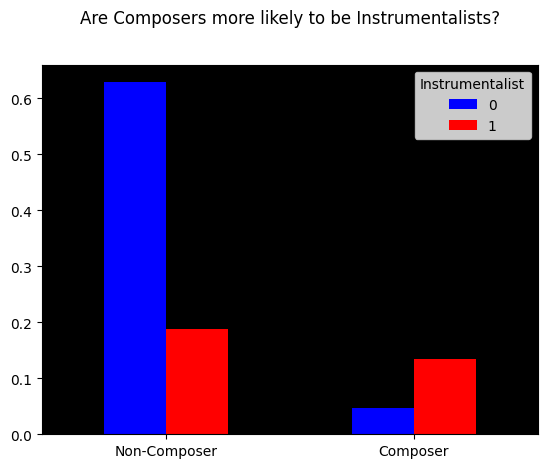

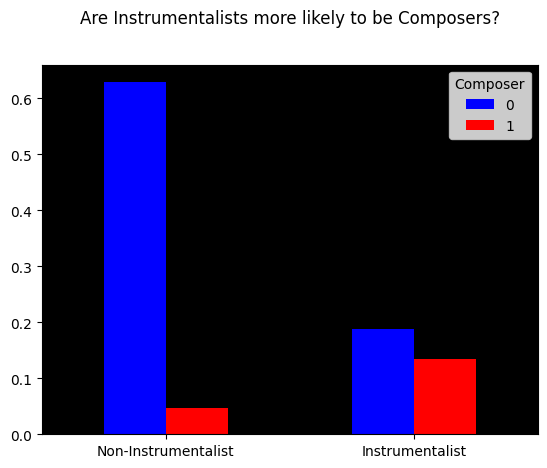

In [ ]:
ins_com = pd.crosstab(data['Instrumentalist'], data['Composer'], normalize = 'all')
fig, ax = plt.subplots()
ins_com.T.plot(kind = 'bar', color = ['blue', 'red'], rot = 0, ax = ax)
ax.set_xticklabels(['Non-Composer', 'Composer'])
ax.set_facecolor('black')
ax.set_xlabel('')
ax.set_title('Are Composers more likely to be Instrumentalists?', loc = 'center', pad = 30)
plt.show()

com_ins = pd.crosstab(data['Composer'], data['Instrumentalist'], normalize = 'all')
fig, ax = plt.subplots()
com_ins.T.plot(kind = 'bar', color = ['blue', 'red'], rot = 0, ax = ax)
ax.set_xticklabels(['Non-Instrumentalist', 'Instrumentalist'])
ax.set_facecolor('black')
ax.set_xlabel('')
ax.set_title('Are Instrumentalists more likely to be Composers?', loc = 'center', pad = 30)
plt.show()

### 🔹 Do people who play musical instruments regularly spend a lot of time listening to music per day?
#### There is no significant difference in the average amount of time spent listening to music per day between people who play a musical instrument regularly and those who do not.

<br>

### 🔹 Do people who compose music spend a lot of time listening to music per day?
#### On average, people who compose music listen to music for 4.5 hours, compared to 3.3 hours for those who don't compose music, showing a difference of more than an hour.

In [ ]:
for i in ['Instrumentalist', 'Composer']:
    hour_music = data.groupby(i)['Hours per day'].mean().round(1).reset_index()
    bar_width = 0.3
    comp_labels = [f'Non-{i}' if val == 0 else i for val in hour_music[i]]
    fig = px.bar(data_frame = hour_music, x = comp_labels, y = 'Hours per day', template = 'plotly_dark', color_discrete_sequence = px.colors.qualitative.Set3)
    fig.update_layout(title=f'Do {i}s spend more Time<br>listening to music per day?', margin=dict(t = 100), title_x = 0.5, title_xanchor = 'center',
                      yaxis = dict(title = 'Hours per day', title_standoff = 20), bargap = 0.5,
                      hoverlabel_bgcolor = 'white', height = 400, width = 600)
    fig.update_traces(hovertemplate = '<b>%{x}</b><br><b>Value:</b> %{y}', width = bar_width)
    fig.update_xaxes(title = '', showline = True, linewidth = 3, linecolor = 'red')
    fig.update_yaxes(showline = True, linewidth = 3, linecolor = 'red')
    fig.show()

### 🔹 Do people who listen to music while working spend more time listening to music per day on average?

#### On average, individuals who listen to music while working spent 3.9 hours listening to music, while those who don't listen to music while working spent 2.2 hours. This indicates a significant difference between the two groups.

In [ ]:
while_music = data.groupby('While working')['Hours per day'].mean().round(1).reset_index()
bar_width = 0.3
work_labels = ['While working X' if Whileworking == 0 else 'While working O' for Whileworking in while_music['While working']]
fig = px.bar(data_frame = while_music, x = work_labels, y = 'Hours per day', template = 'plotly_dark', color_discrete_sequence = px.colors.qualitative.Set3)
fig.update_layout(title = 'Do people who listen to music While working<br>spend more Time listening to music per day?', margin = dict(t = 100), title_x = 0.5, title_xanchor = 'center',
                  xaxis = dict(title_text = '', title_standoff = 0), yaxis = dict(title_standoff = 20), bargap = 0.5,
                  hoverlabel_bgcolor = 'white', height = 400, width = 600)
fig.update_traces(hovertemplate = '<b>%{x}</b><br><b>Value:</b> %{y}', width = bar_width)
fig.update_xaxes(showline = True, linewidth = 3, linecolor = 'red', tickvals = [0, 1], ticktext = ['While working X', 'While working O'])
fig.update_yaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.show()

### 🔹 What is the proportion of people who listen to music in foreign languages?

#### The proportion of people who do not listen to foreign language music is slightly higher than the proportion of people who listen to foreign language music.

In [ ]:
for_music = data['Foreign languages'].value_counts(normalize = True).round(2)
bar_width = 0.3
for_labels = ['Foreign languages X' if Foreignlanguages == 0 else 'Foreign languages O' for Foreignlanguages in for_music.index]
fig = px.bar(data_frame = for_music, x = for_labels, y = for_music, template = 'plotly_dark', color_discrete_sequence = px.colors.qualitative.Set3)
fig.update_layout(title = 'Percentage of people listening to music in Foreign languages', margin = dict(t = 100), title_x = 0.5, title_xanchor = 'center',
                  xaxis = dict(title_text = '', title_standoff = 0), yaxis = dict(title_text = 'Ratio', title_standoff = 20), bargap = 0.5,
                  hoverlabel_bgcolor = 'white', height = 400, width = 600)
fig.update_traces(hovertemplate = '<b>%{x}</b><br><b>Value:</b> %{y}', width = bar_width)
fig.update_xaxes(showline = True, linewidth = 3, linecolor = 'red', tickvals = [0, 1], ticktext = ['Foreign languages X', 'Foreign languages O'])
fig.update_yaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.show()

### 🔹 Number of music genres and average frequency according to exploratory characteristics

#### After analyzing the data through a graph, it was concluded that the number of music genres and the average frequency of people exploring different genres cannot be used as the only factors to determine whether someone has an exploratory tendency or not.

In [ ]:
exp_music = data.groupby('Exploratory')['Frequency count'].value_counts().reset_index(name = 'Counts')
fig = px.scatter(data_frame = data, x = 'Exploratory', y = 'Frequency count', color = 'Average frequency', template = 'plotly_dark', color_continuous_scale = px.colors.sequential.Sunsetdark)
fig.update_layout(title = 'Number of music genres and Average frequencies<br>by people with and without Exploratory characteristics', margin = dict(t = 100), title_x = 0.5, title_xanchor = 'center',
                  xaxis = dict(title_standoff = 20), yaxis = dict(title = 'Number of music genres', title_standoff = 20),
                  height = 600, width = 600)
fig.update_traces(hovertemplate = '<b>Exploratory:</b> %{x} <br><b>Number of music genres:</b> %{y}<br><b>Average frequency:</b> %{marker.color}')
fig.update_coloraxes(colorbar = dict(title = dict(side = 'right', text = 'Average frequency')))
fig.update_xaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.update_yaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.show()

### 🔹 Correlation between anxiety, depression, insomnia, and OCD

#### When looking at the distribution of correlations between anxiety, depression, insomnia, and OCD, the correlation coefficient between anxiety and depression is the highest at 0.53, followed by the correlation coefficients between anxiety and OCD, depression and insomnia at 0.34 and between anxiety and insomnia. The correlation coefficient was high at 0.30. On the graph, all factors show a positive correlation, so it can be said that they influence each other to some extent.

In [ ]:
music_corr = data[['Anxiety', 'Depression', 'Insomnia', 'OCD']].corr().round(2)
fig = px.imshow(music_corr, text_auto = '.2f', template = 'plotly_dark', color_continuous_scale = px.colors.sequential.Sunsetdark)
fig.update_layout(title = 'Correlation between Various factors', margin = dict(t = 60), title_x = 0.5, title_xanchor = 'center',
                  height = 600, width = 600)
fig.update_xaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.update_yaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.show()

### 🔹 Correlation between each music genre

#### The highest correlation appears in that order: Hip hop and Rap, Hip hop and R&B, and R&B and Rap, with the lowest correlation between K pop and Rock. Through this, it is possible to guess which genre of music a listener would prefer among other genres.

In [ ]:
music_corr = data[['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music']].corr().round(2)
fig = px.imshow(music_corr, text_auto = '.2f', template = 'plotly_dark', color_continuous_scale = px.colors.sequential.Sunsetdark)
fig.update_layout(title = 'Correlation between Music genres', margin = dict(t = 60), title_x = 0.5, title_xanchor = 'center',
                  height = 600, width = 600)
fig.update_xaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.update_yaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.show()

### 🔹 The frequency of listening to other genres depending on which genre people prefer the most

#### When examining the listening habits of people who prefer Classical music, it was discovered that they tend to listen to Pop music the most frequently, while Rap music is the least frequently listened to genre. The study also revealed that individuals who enjoy Classical music typically do not listen to music such as EDM or Lofi. By determining a person's favorite music genre, it is possible to predict which other genres they may enjoy or avoid listening to.

In [ ]:
genre_freq = data.groupby('Fav genre')[['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music']].mean().round(1).reset_index()
genre_freq_long = pd.melt(genre_freq, id_vars = 'Fav genre', value_vars = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music'],
                          var_name = 'Genre', value_name = 'Frequency')
fig = px.scatter(data_frame = genre_freq_long, x = 'Fav genre', y = 'Frequency', color = 'Genre',
                 labels = {'Frequency': 'Frequency', 'Favorite genre': 'Favorite Genre'}, template = 'plotly_dark', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title = 'Frequency of other genres people listen to depending on their Favorite genres', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
                  xaxis = dict(title_text = 'Favorite genre', title_standoff = 20), yaxis = dict(title_standoff = 20), bargap = 0.4,
                  height = 800, width = 1000)
fig.update_xaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.update_yaxes(showline = True, linewidth = 3, linecolor = 'red')
fig.update_traces(hovertemplate = '<b>Frequency:</b> %{y}')
fig.show()

### 🔹 What is the relationship between the average amount of time spent listening to music per day and anxiety, depression, insomnia, OCD, and music effects?

#### I was unable to find any significant pattern between them.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']
fig = make_subplots(rows = 3, cols = 2, subplot_titles = categories)
for i, category in enumerate(categories, start = 1):
    df3 = data.groupby('Hours per day')[category].mean().round(1).reset_index()
    fig.add_trace(go.Bar(x = df3['Hours per day'], y = df3[category], name = category, marker = dict(color = px.colors.qualitative.Pastel1[i-1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    for i in range(1, 6):
        fig.update_xaxes(title_text = 'Hours per day', title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_yaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_traces(hovertemplate = '<b>Hours per day:</b> %{x}<br><b>Value:</b> %{y}')
fig.update_layout(title = 'Association between Time spent listening to music per day and Various factors', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
                  bargap = 0.3,
                  hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 1200, width = 1000)
fig.show()

### 🔹 What is the connection between people who listen to music while working and anxiety, depression, insomnia, OCD, and music effects?

#### People who listen to music while working have higher anxiety, depression, insomnia, and OCD levels, but the differences were not significant. Among the four factors, OCD scores are higher among those who listen to music while working. There is a relatively large difference between those who do not.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig = make_subplots(rows = 2, cols = 2, subplot_titles = categories)
bar_width = 0.3
for i, category in enumerate(categories, start = 1):
    df4 = data.groupby('While working')[category].mean().round(1).reset_index()
    work_labels = ['While working X' if Whileworking == 0 else 'While working O' for Whileworking in df4['While working']]
    fig.add_trace(go.Bar(x = work_labels, y = df4[category], name = category, width = bar_width, marker=dict(color = px.colors.qualitative.Pastel1[i-1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    for i in range(1, 5):
        fig.update_xaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red', row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
        fig.update_yaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_traces(hovertemplate = '<b>%{x}</b><br><b>Value:</b> %{y}')
fig.update_layout(title = 'The relationship between whether or not people listen to music<br>While working and Various factors', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
                  bargap = 0.1,
                  hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 800, width = 1000)
fig.show()

### 🔹 What is the connection between BPM and anxiety, depression, insomnia, and OCD?

#### I couldn't find any particular pattern between them.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig = make_subplots(rows = 2, cols = 2, subplot_titles = categories)
bar_width = 0.2
for i, category in enumerate(categories, start = 1):
    df = data.groupby('BPM')[category].mean().round(1).reset_index()
    fig.add_trace(go.Scatter(x = df['BPM'], y = df[category], name = category, mode = 'markers', marker = dict(color = px.colors.qualitative.Pastel1[i-1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    for i in range(1, 5):
        fig.update_xaxes(title_text = 'BPM', title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_yaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_traces(hovertemplate = '<b>BPM:</b> %{x}<br><b>Value:</b> %{y}')
fig.update_layout(title = 'Association between BPM and Various factors', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
                  bargap = 0.4,
                  hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 800, width = 1000)
fig.show()

### 🔹 What is the connection between music effects and anxiety, depression, insomnia, and OCD?

#### For people with an anxiety level of 4 or higher, music effects appear slightly higher, and other than that, no other patterns were found.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig = make_subplots(rows = 2, cols = 2, subplot_titles = categories)
bar_width = 0.2
for i, category in enumerate(categories, start = 1):
    df5 = data.groupby(category)['Music effects'].mean().round(1).reset_index()
    fig.add_trace(go.Bar(x = df5[category], y = df5['Music effects'], name = category, marker = dict(color = px.colors.qualitative.Pastel1[i-1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    for i in range(1, 5):
        fig.update_xaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_yaxes(title_text = 'Music effects', title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_traces(hovertemplate = '<b>Music effects:</b> %{y}<br><b>Value:</b> %{x}')
fig.update_layout(title = 'Association between Various factors and Music effects', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
                  bargap = 0.4,
                  hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 800, width = 1000)
fig.show()

### 🔹 Anxiety, depression, insomnia, and OCD values according to favorite genre

#### Commonly, when the most preferred genre is Rock, Lofi, Video game music, levels of anxiety, depression, insomnia, and OCD appear high.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig = make_subplots(rows = 2, cols = 2, subplot_titles = categories)
bar_width = 0.5
for i, category in enumerate(categories, start = 1):
    df6 = data.groupby('Fav genre')[category].mean().round(1).reset_index().sort_values(category, ascending = False)
    fig.add_trace(go.Bar(x = df6['Fav genre'], y = df6[category], name = category, width = bar_width, marker = dict(color = px.colors.qualitative.Pastel1[i - 1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    fig.update_xaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red', tickangle = 45, tickmode = 'array', tickvals = df6['Fav genre'], ticktext = df6['Fav genre'], ticksuffix = '  ', row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    fig.update_yaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red', row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    fig.update_traces(hovertemplate = '<b>Favorite genre:</b> %{x}<br><b>Value:</b> %{y}', row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
fig.update_layout(title = 'Association between Favorite genres and Various factors', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
                  bargap = 0.3,
                  hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 800, width = 1000)
fig.show()

### 🔹 What is the relationship between the number of music genres people listen to and anxiety, depression, insomnia, and OCD?

#### As the insomnia and depression values on the graph increase, the number of genres people listen to tends to increase. Other than that, I couldn't find any other patterns.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig = make_subplots(rows = 2, cols = 2, subplot_titles = categories)
for i, category in enumerate(categories, start = 1):
    df9 = data.groupby('Frequency count')[category].mean().round(1).sort_values(ascending = False).reset_index()
    fig.add_trace(go.Scatter(x = df9[category], y = df9['Frequency count'], mode = 'markers', name = category, marker = dict(color = px.colors.qualitative.Pastel1[i-1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    for i in range(1, 5):
        fig.update_xaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_yaxes(title_text = 'Number of music genres', title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_traces(hovertemplate = '<b>Number of music genres:</b> %{y}<br><b>Value:</b> %{x}')
fig.update_layout(
    title = "Association between Various Factors and<br>Number of music genres people listen to", margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
    hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 800, width = 1000)
fig.show()

### 🔹 Is there any relationship between people who regularly play musical instruments and anxiety, depression, insomnia, and OCD?

#### People who play a musical instrument regularly have slightly higher anxiety, depression, insomnia, and OCD levels.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig = make_subplots(rows = 2, cols = 2, subplot_titles = categories)
bar_width = 0.3
for i, category in enumerate(categories, start = 1):
    df7 = data.groupby('Instrumentalist')[category].mean().round(1).reset_index()
    ins_labels = ['Non-Instrumentalist' if Instrumentalist == 0 else 'Instrumentalist' for Instrumentalist in df7['Instrumentalist']]
    fig.add_trace(go.Bar(x = ins_labels, y = df7[category], name = category, width = bar_width, marker = dict(color = px.colors.qualitative.Pastel1[i-1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    for i in range(1, 5):
        fig.update_xaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red', row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
        fig.update_yaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_traces(hovertemplate = '<b>%{x}</b><br><b>Value:</b> %{y}')
fig.update_layout(
        title = 'The relationship between whether one is an Instrumentalist or not and Various factors', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
        bargap = 0.1,
        hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 800, width = 1000)
fig.show()

### 🔹 What is the connection between people who compose music and anxiety, depression, insomnia, and OCD?

#### Compared to people who don't compose, people who compose have slightly higher anxiety, depression, insomnia, and OCD levels.

In [ ]:
categories = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig = make_subplots(rows = 2, cols = 2, subplot_titles = categories)
bar_width = 0.3

for i, category in enumerate(categories, start = 1):
    df8 = data.groupby('Composer')[category].mean().round(1).reset_index()
    composer_labels = ['Non-Composer' if Composer == 0 else 'Composer' for Composer in df8['Composer']]
    fig.add_trace(go.Bar(x = composer_labels, y = df8[category], name = category, width = bar_width, marker = dict(color = px.colors.qualitative.Pastel1[i-1])), row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
    for i in range(1, 5):
        fig.update_xaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red', row = (i - 1) // 2 + 1, col = (i - 1) % 2 + 1)
        fig.update_yaxes(title_standoff = 20, showline = True, linewidth = 3, linecolor = 'red')
        fig.update_traces(hovertemplate = '<b>%{x}</b><br><b>Value:</b> %{y}')
fig.update_layout(
    title = 'The relationship between whether one is a Composer or not and Various factors', margin = dict(t = 150, b = 100, l = 50, r = 50), title_x = 0.5, title_xanchor = 'center',
    bargap = 0.1,
    hoverlabel_bgcolor = 'white', plot_bgcolor = 'black', height = 800, width = 1000)
fig.show()